<a href="https://colab.research.google.com/github/chilezdengr/Connect-Sessions-on-Data-Wrangling-and-Visualisations/blob/main/Session_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Next Week Agenda:

- Outliers,
- Scales,
- Transformations - e.g Log Transforms, 
- Palettes and Graph redefinition
- Plotting data in terms of absolute and relative frequency
- Data Viz Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Univariate Data Exploration

The are one dimensional explorations of a single data value

We can do this for numerical with histograms

1.   For matlotlib: plt.hist()
2.   For seaborn: sns.distplot()

Using the IQR

In [ ]:
describe_sr = df['fare'].describe()
IQR = describe_sr['75%'] - describe_sr['25%']
IQR

23.0896

In [ ]:
upper = describe_sr['75%']  + 1.5*IQR
upper

65.6344

In [ ]:
lower = describe_sr['25%']  - 1.5*IQR
lower = lower if lower>0 else lower

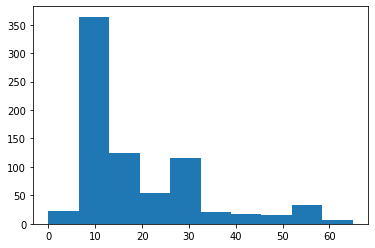

In [ ]:
df_iqr = df.query('fare >@lower and fare< @upper')
plt.hist(x='fare', data=df_iqr);

Not using the IQR

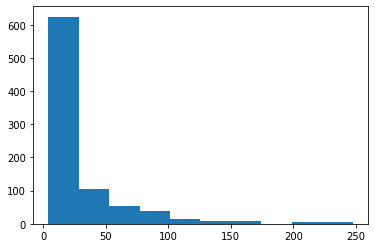

In [ ]:
#matplotlib
df_copy = df.query('fare <250 and fare > 0')
plt.hist(x='fare', data=df_copy);

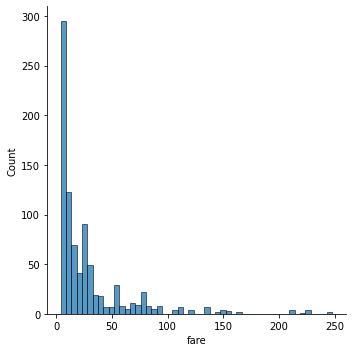

In [ ]:
sns.displot(x='fare', data=df_copy, kde=False);

Bivariate Exploration Of Data

The are two dimensional explorations of a single data value
- Scatterplot: Numerical vs Numerical
- Line Plot: Numerical vs Numerical
- Heatmap: outlier can work for both
- Violin plot: Numerical vs Categorical
- Box plot: Numerical vs Categorical
- Bar chart: Numerical vs Categorical
- Pie Chart: Numerical vs Categorical
- Clustered Bar Chart


Let's look at a scatterplot:

- Matplotlib: plt.scatter
- seaborn: sns.regplot

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_test = df[(df['class']=="First") & (df['fare']<250)  & (df['fare']>0) ]
df_test['class'].value_counts()

First     202
Second      0
Third       0
Name: class, dtype: int64

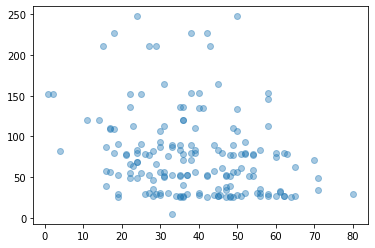

In [ ]:
plt.scatter(x='age', y='fare', alpha=0.4, data=df_test)

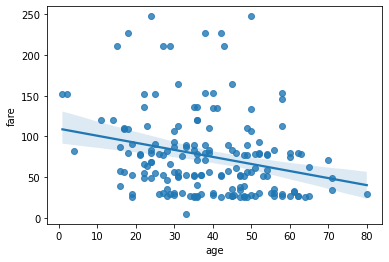

In [ ]:
sns.regplot(x='age', y='fare', data=df_test);

Let's look at a lineplot:

- Matplotlib: plt.plot
- seaborn: sns.lineplot

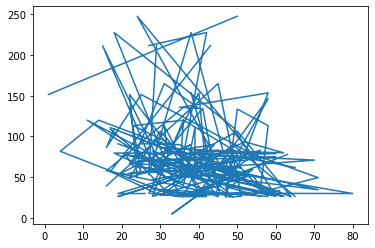

In [ ]:
plt.plot('age', 'fare', data=df_test);

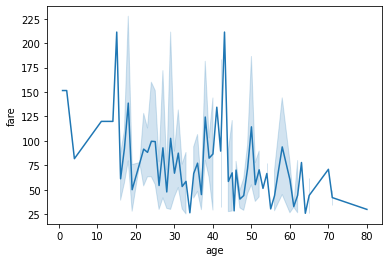

In [ ]:
sns.lineplot(x='age', y='fare', data=df_test);

Violin plot: Numerical vs Categorical. (Quantitative vs Qualitative Data)

- Seaborn: sns.violinplot

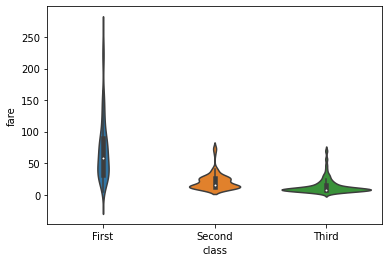

In [ ]:
#fares across different classes
#This essentially plots histograms on the same chart.
sns.violinplot(x='class', y='fare', data=df_copy);

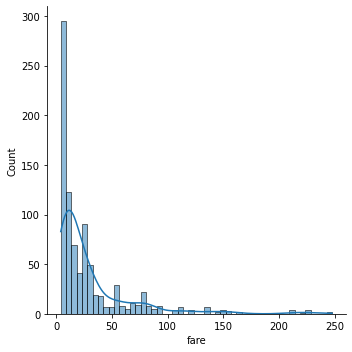

In [ ]:
#if we were to subset this for first class only, 
sns.displot(x='fare', data=df_copy, kde=True);

A related plot: box plot

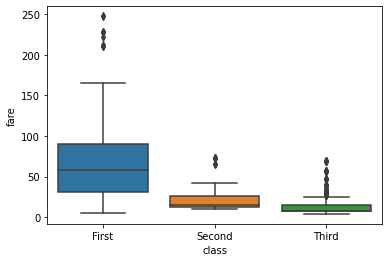

In [ ]:
sns.boxplot(x='class', y='fare', data=df_copy);

Bar Chart

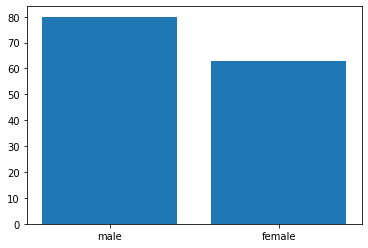

In [ ]:
plt.bar(x='sex', height='age', data=df_copy);

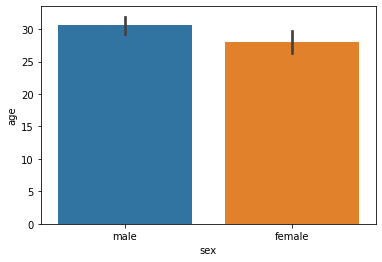

In [ ]:
sns.barplot(x='sex', y='age', data=df_copy)

Heatmap: outlier can work for both

- matplotlib: plt.hist2d
- seaborn: sns.heatmap

In [ ]:
plt.hist2d(x='alive', y='sex', data=df_test.dropna(axis=0));

AttributeError: ignored

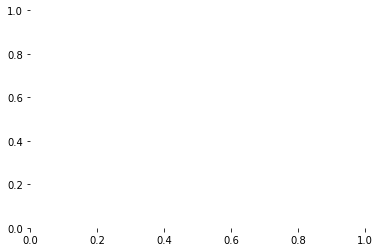

In [ ]:
df_heat= df_test.dropna(axis=0);
df_heat = df[['age', 'fare']]
sns.heatmap(x='age', y='fare', data=df_heat);